# Discrete Deconvolution
## To do
- Write notes on theory in LaTeX.

## Introduction
We assume Y = X + E, where X and E are independent. The density of Y is observed and a model for the density of E is available. The ultimate goal is to compute P(X=x|Y=y).


## Theory
Let f<sub>z</sub> be the density of Z. If X and E are independent, f<sub>Y</sub>=f<sub>X</sub>\*f<sub>E</sub>, where * denotes the convolution operator.

## Materials and methods

### Data

E. coli, beta-lactams, CRO

### Methods

In [191]:
import numpy as np
from scipy import signal, linalg, optimize, stats
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [192]:
def errorVector(sig, b):
    e = stats.norm.pdf(range(-b, b + 1), 0, sig)
    e /= sum(e)
    return e

print errorVector(2, 2)

def mySummary(y, xHat, title):
    print '*************************************************'
    plt.plot(y, label='y')
    plt.plot(xHat, label='xHat')
    plt.legend()
    plt.title(title)
    plt.show()
    
    print 'Sum of xHat = ' + str(sum(xHat))
    print

[ 0.15246914  0.2218413   0.25137912  0.2218413   0.15246914]


## Results

### Tests

#### Test scipy.signal.convolve() and scipy.signal.deconvolve()

Error: 3 : [ 1.  2.  1.]
x: 10 : [ 3.  2.  0.  0.  1.  3.  5.  6.  2.  1.]
y: 12 : [  3.   8.   7.   2.   1.   5.  12.  19.  19.  11.   4.   1.]


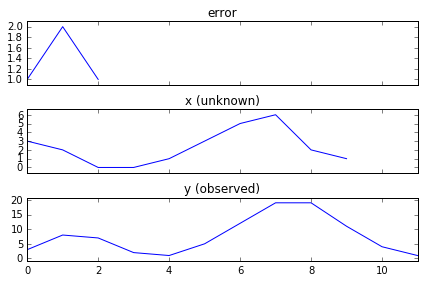

In [193]:
x = np.array([3., 2., 0., 0., 1., 3., 5., 6., 2., 1.])
e = np.array([1., 2., 1.])
y = signal.convolve(x, e, mode='full')
print 'Error:', len(e), ':', e
print 'x:', len(x), ':', x
print 'y:', len(y), ':', y

fig, (ax_e, ax_x, ax_y) = plt.subplots(3, 1, sharex=True)
ax_e.plot(e)
ax_e.set_title('error')
ax_e.margins(0, 0.1)
ax_x.plot(x)
ax_x.set_title('x (unknown)')
ax_x.margins(0, 0.1)
ax_y.plot(y)
ax_y.set_title('y (observed)')
ax_y.margins(0, 0.1)
fig.tight_layout()
fig.show()

In [194]:
xHat, delta = signal.deconvolve(y, e)
print 'x   :', len(x), ':', x
print 'xHat:', len(xHat), ':', xHat
print 'delta:', len(delta), ':', delta
assert all(x == xHat)

x   : 10 : [ 3.  2.  0.  0.  1.  3.  5.  6.  2.  1.]
xHat: 10 : [ 3.  2.  0.  0.  1.  3.  5.  6.  2.  1.]
delta: 12 : [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


### Real data

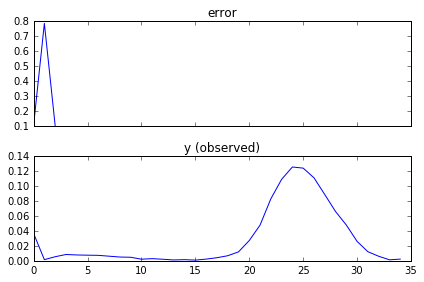

In [195]:
y = np.array([0.0365553963, 0.00153594101986484, 0.00542699160352242, 0.00839647757526111, 0.00778210116731518, 0.00747491296334221, 0.00727012082736023, 0.00614376407945935, 0.00501740733155847, 0.0047102191275855, 0.00215031742781077, 0.0028670899037477, 0.00204792135981978, 0.00112635674790088, 0.00153594101986484, 0.000921564611918902, 0.00225271349580176, 0.00409584271963957, 0.00675814048740528, 0.0118779438869547, 0.0270325619496211, 0.04761417161581, 0.0826336268687282, 0.108642228138439, 0.125025599016998, 0.123489657997133, 0.110587753430268, 0.0882654106082326, 0.065635879582224, 0.04761417161581, 0.0258038091337293, 0.0120827360229367, 0.00604136801146836, 0.00133114888388286, 0.00225271349580176])
e = np.array([0.106506978919201, 0.786986042161599, 0.106506978919201])

fig, (ax_e, ax_y) = plt.subplots(2, 1, sharex=True)
ax_e.plot(e)
ax_e.set_title('error')
ax_y.plot(y)
ax_y.set_title('y (observed)')
fig.tight_layout()
fig.show()

#### scipy.signal.deconvolve()

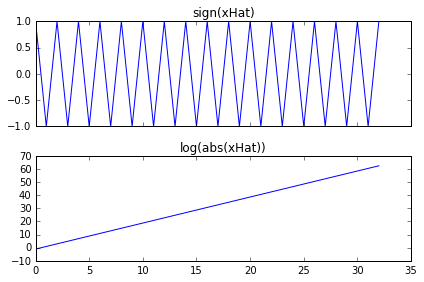

In [196]:
xHat, delta = signal.deconvolve(y, e)

fig, (ax_x, ax_x2) = plt.subplots(2, 1, sharex=True)
ax_x.plot(np.sign(xHat))
ax_x.set_title('sign(xHat)')
ax_x2.plot([math.log(math.fabs(i)) for i in xHat])
ax_x2.set_title('log(abs(xHat))')
fig.tight_layout()
fig.show()

The solution has negative values, oscillates, and growing absolute values (from left to right) and is thus completely useless.

We therefore try a linear algebra based approach, i.e. we do not exploit the Fourier-convolution theorem.

#### Solve the linear system of equation
E*x=y where E is a Toeplitz matrix.
##### Test scipy.linalg.toeplitz()

In [197]:
tmpE = np.array([1., 2., 1.]) / 4
n = len(y)

print linalg.toeplitz(np.concatenate([tmpE, np.zeros(n - 1)]), np.concatenate([[tmpE[0]], np.zeros(n - 1)]))

[[ 0.25  0.    0.   ...,  0.    0.    0.  ]
 [ 0.5   0.25  0.   ...,  0.    0.    0.  ]
 [ 0.25  0.5   0.25 ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.25  0.5   0.25]
 [ 0.    0.    0.   ...,  0.    0.25  0.5 ]
 [ 0.    0.    0.   ...,  0.    0.    0.25]]


##### Least-squares

*************************************************


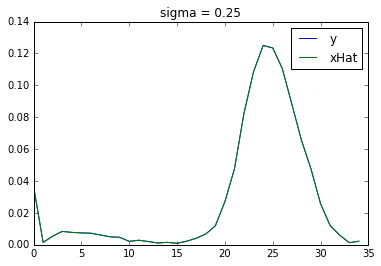

Sum of xHat = 1.00001301401

*************************************************


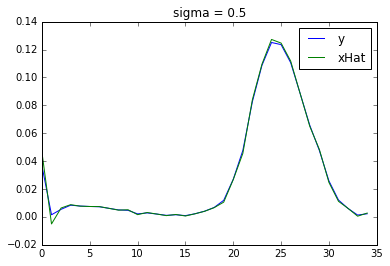

Sum of xHat = 1.00459804104

*************************************************


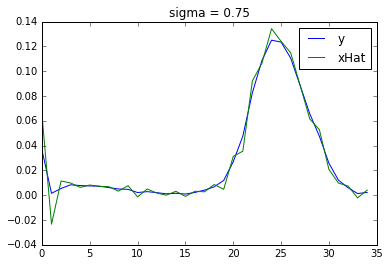

Sum of xHat = 1.01065931811

*************************************************


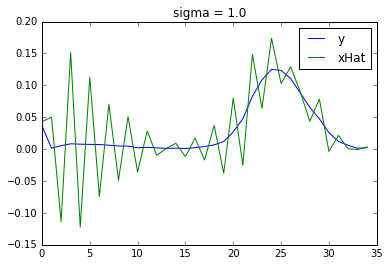

Sum of xHat = 1.00863840997

*************************************************


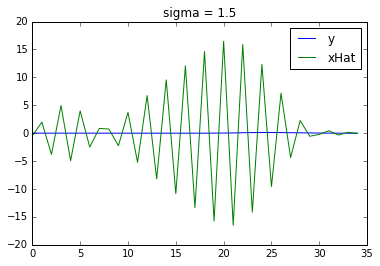

Sum of xHat = 0.992054502603



In [198]:
sig = [0.25, 0.5, 0.75, 1., 1.5]

for s in sig:
    b = int(math.ceil(4.0 * s))
    e = errorVector(s, b)
    
    E = linalg.toeplitz(np.concatenate([e, np.zeros(n - 1)]), np.concatenate([[e[0]], np.zeros(n - 1)]))
    yPadded = np.concatenate([np.zeros(b), y, np.zeros(b)])
    
    xHat = linalg.lstsq(E, yPadded)[0]
    
    mySummary(y, xHat, 'sigma = ' + str(s))
    

We observe undesired oscillations and negative values for sigma >= 0.75.

We try to improve the boundary conditions.

*************************************************


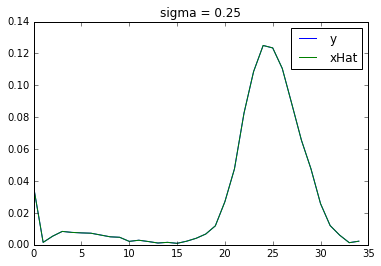

Sum of xHat = 1.00000000003

*************************************************


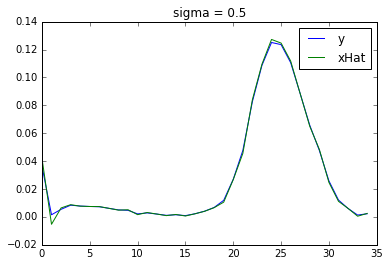

Sum of xHat = 1.00000000003

*************************************************


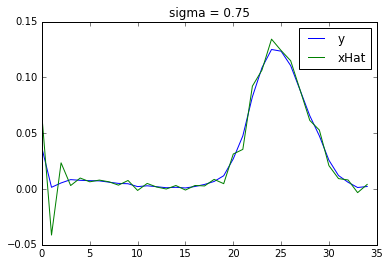

Sum of xHat = 1.00000000003

*************************************************


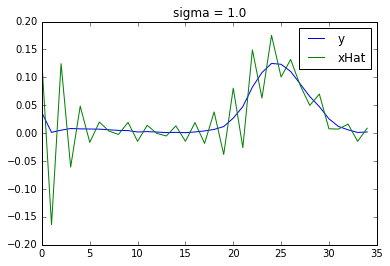

Sum of xHat = 1.00000000003

*************************************************


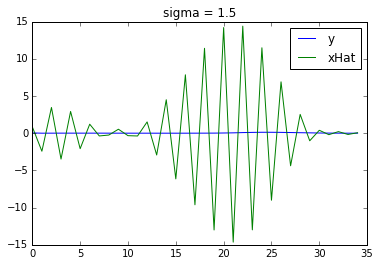

Sum of xHat = 1.00000000003



In [199]:
sig = [0.25, 0.5, 0.75, 1., 1.5]

for s in sig:
    b = int(math.ceil(4.0 * s))
    e = errorVector(s, b)
    
    E = linalg.toeplitz(np.concatenate([e[b:], np.zeros(n - 1 - b)]), np.concatenate([e[b:], np.zeros(n - 1 - b)]))
    colSums = E.sum(axis=0)
    E = E / colSums[np.newaxis, :]
    
    xHat = linalg.solve(E, y)
    
    mySummary(y, xHat, 'sigma = ' + str(s))


The problem remains. We therefore add the constrain x >= 0.

##### Non-linear least squares

*************************************************


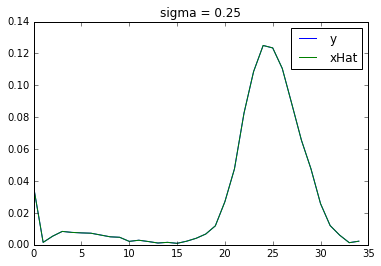

Sum of xHat = 1.00000000003

*************************************************


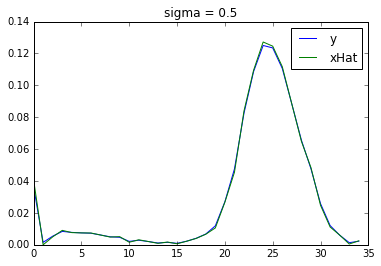

Sum of xHat = 1.00287851739

*************************************************


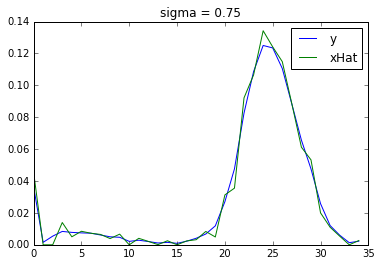

Sum of xHat = 1.00614961139

*************************************************


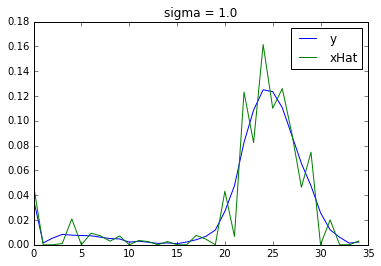

Sum of xHat = 1.00481674024

*************************************************


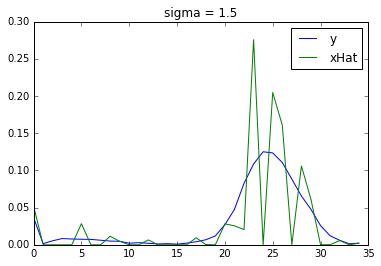

Sum of xHat = 1.00373203152

*************************************************


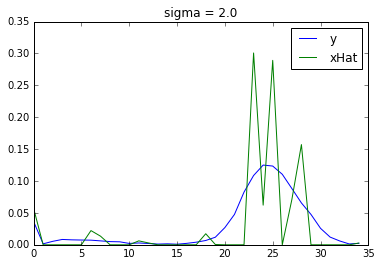

Sum of xHat = 1.00302239127

*************************************************


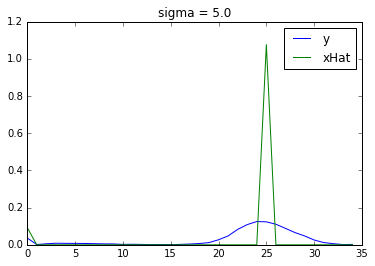

Sum of xHat = 1.16894649717



In [200]:
sig = [0.25, 0.5, 0.75, 1., 1.5, 2., 5.]

for s in sig:
    b = int(math.ceil(4.0 * s))
    e = errorVector(s, b)
    
    E = linalg.toeplitz(np.concatenate([e[b:], np.zeros(n - 1 - b)]), np.concatenate([e[b:], np.zeros(n - 1 - b)]))
    colSums = E.sum(axis=0)
    E = E / colSums[np.newaxis, :]
    
    xHat = optimize.nnls(E, y)[0]
    
    mySummary(y, xHat, 'sigma = ' + str(s))

The solution is indeed positive but the problem of oscillations remains.

Next we try Tikhonov regularization.

*************************************************


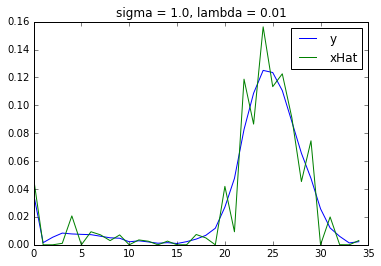

Sum of xHat = 1.0

*************************************************


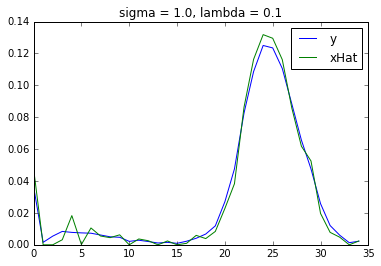

Sum of xHat = 1.0

*************************************************


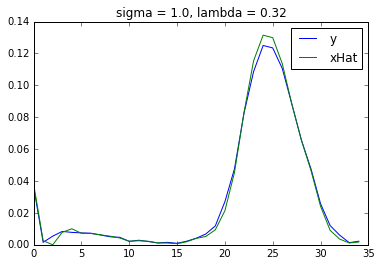

Sum of xHat = 1.0

*************************************************


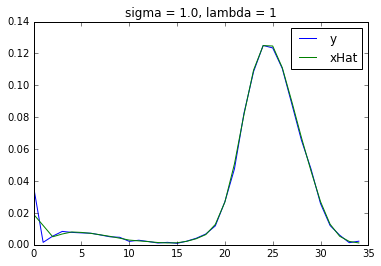

Sum of xHat = 1.0

*************************************************


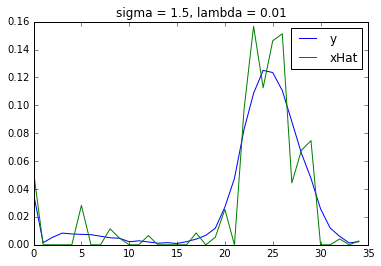

Sum of xHat = 1.0

*************************************************


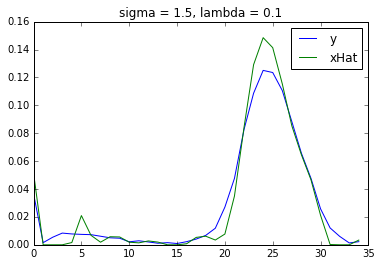

Sum of xHat = 1.0

*************************************************


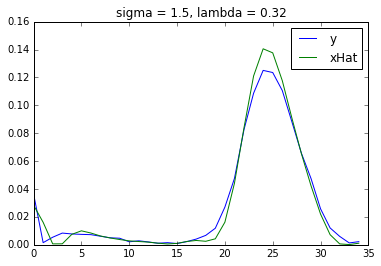

Sum of xHat = 1.0

*************************************************


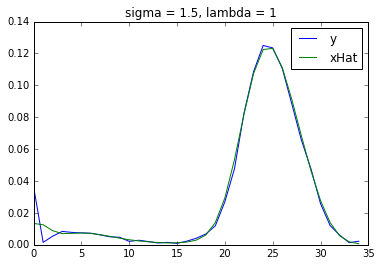

Sum of xHat = 1.0

*************************************************


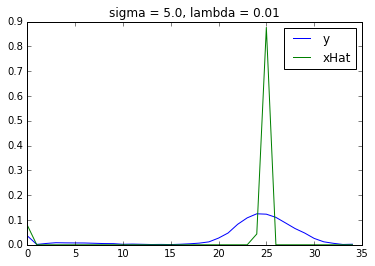

Sum of xHat = 1.0

*************************************************


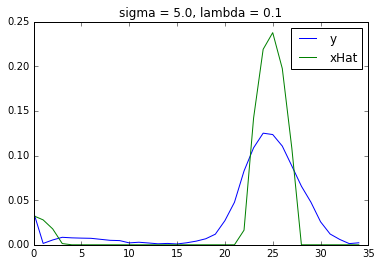

Sum of xHat = 1.0

*************************************************


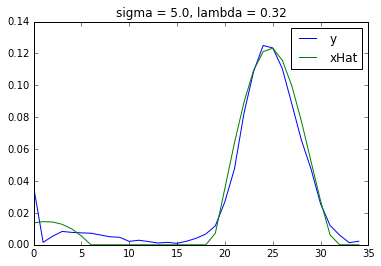

Sum of xHat = 1.0

*************************************************


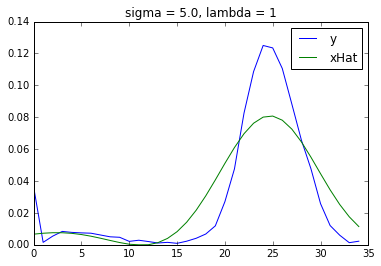

Sum of xHat = 1.0



In [201]:
sig = [1., 1.5, 5.]

for s in sig:
    for lmbd in [0.01, 0.1, 0.32, 1]:
        b = int(math.ceil(4.0 * s))
        e = errorVector(s, b)
    
        E = linalg.toeplitz(np.concatenate([e[b:], np.zeros(n - 1 - b)]), np.concatenate([e[b:], np.zeros(n - 1 - b)]))
        E = np.concatenate((E, lmbd * np.identity(n)))
        colSums = E.sum(axis=0)
        E = E / colSums[np.newaxis, :]
        yT = np.concatenate((y, np.zeros(n)))
    
        xHat = optimize.nnls(E, yT)[0]  # lstsq() can lead to negative solutions
    
        mySummary(y, xHat / sum(xHat), 'sigma = ' + str(s) + ', lambda = ' + str(lmbd))

How should one choose lambda???

Although this doesn't address the previous question, we now try a different type of regularization that should force x<sub>i</sub>~x<sub>i+1</sub>.

*************************************************


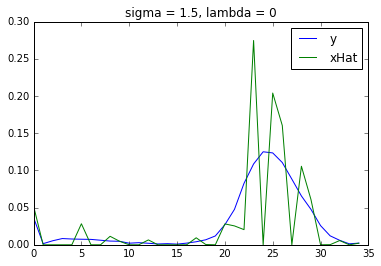

Sum of xHat = 1.0

*************************************************


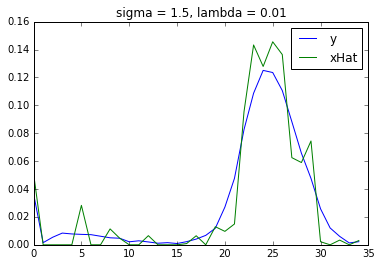

Sum of xHat = 1.0

*************************************************


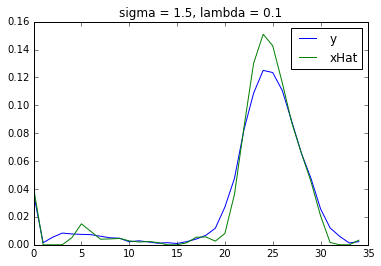

Sum of xHat = 1.0

*************************************************


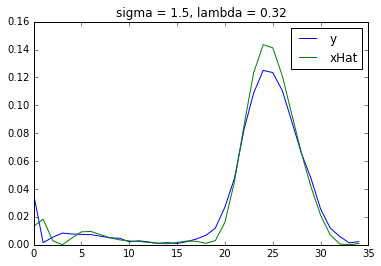

Sum of xHat = 1.0

*************************************************


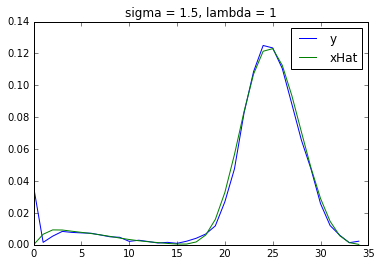

Sum of xHat = 1.0

*************************************************


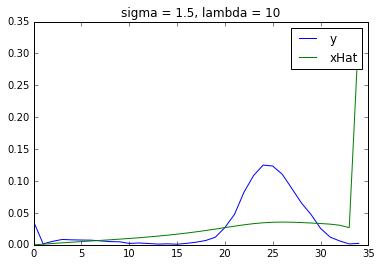

Sum of xHat = 1.0



In [202]:
sig = [1.5]

for s in sig:
    for lmbd in [0, 0.01, 0.1, 0.32, 1, 10]:
        b = int(math.ceil(4.0 * s))
        e = errorVector(s, b)
    
        E = linalg.toeplitz(np.concatenate([e[b:], np.zeros(n - 1 - b)]), np.concatenate([e[b:], np.zeros(n - 1 - b)]))
        C = linalg.toeplitz(np.concatenate([[-1.], np.zeros(n - 2)]), np.concatenate([[-1., 1.], np.zeros(n - 2)]))
        E = np.concatenate((E, lmbd * C))
        colSums = E.sum(axis=0)
        E = E / colSums[np.newaxis, :]
        yT = np.concatenate((y, np.zeros(n - 1)))
    
        xHat = optimize.nnls(E, yT)[0]  # lstsq() can lead to negative solutions
    
        mySummary(y, xHat / sum(xHat), 'sigma = ' + str(s) + ', lambda = ' + str(lmbd))